<a href="https://colab.research.google.com/github/Salva13s/Entrega_final/blob/main/YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libreria necesaria para utilizar el drive**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
ruta_principal = "/content/drive/MyDrive/tópico 1 ml/archiveseñas" #<---- esta ruta depende de donde este guardado el set de datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
import shutil

ruta_train = os.path.join(ruta_principal, "train")
ruta_test = os.path.join(ruta_principal, "test")

carpeta_destino_train = "/content/dataset/train"

carpeta_destino_test = "/content/dataset/test"


if not os.path.exists(carpeta_destino_train):
    os.makedirs(carpeta_destino_train)
if not os.path.exists(carpeta_destino_test):
    os.makedirs(carpeta_destino_test)


for letra in os.listdir(ruta_train):
    ruta_letra = os.path.join(ruta_train, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_train, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))


for letra in os.listdir(ruta_test):
    ruta_letra = os.path.join(ruta_test, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_test, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))

**Instalación de ultralitycs**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.8/645.8 kB 10.3 MB/s eta 0:00:00


**Se entrena el modelo YOLO con dataset con imágenes con fondo**

In [ ]:
from ultralytics import YOLO

# Cargar un modelo
model = YOLO('/content/yolov8n-cls.pt')    # cargar un modelo preentrenado (recomendado para entrenamiento)


# Entrenar el modelo
results = model.train(data='/content/dataset', epochs=100, imgsz=640, batch=8 )

100%|██████████| 5.28M/5.28M [00:00<00:00, 71.4MB/s]


Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/yolov8n-cls.pt, data=/content/dataset, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=F

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.9MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/dataset/train... 176 images, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 2085.89it/s]

train: New cache created: /content/dataset/train.cache


albumentations: RandomResizedCrop(p=1.0, height=640, width=640, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/dataset/test... 63 images, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 2445.52it/s]

val: New cache created: /content/dataset/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.883G      3.179          8        640:  23%|██▎       | 5/22 [00:02<00:06,  2.70it/s]

      1/100     0.883G      3.123          8        640:  36%|███▋      | 8/22 [00:04<00:05,  2.51it/s]
100%|██████████| 755k/755k [00:00<00:00, 13.4MB/s]
      1/100     0.883G      3.112          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  4.91it/s]

                   all     0.0635       0.27



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.841G       2.99          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.92it/s]

                   all     0.0635      0.317



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.841G      2.853          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.96it/s]

                   all     0.0635      0.317



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.841G      2.692          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.79it/s]


                   all     0.0476      0.333

      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.839G      2.546          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.30it/s]

                   all     0.0794      0.365



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.841G      2.292          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.68it/s]

                   all     0.0952       0.46



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.841G      2.079          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.95it/s]

                   all      0.143      0.492



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.841G      1.914          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.34it/s]

                   all      0.159      0.524



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.841G      1.709          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.35it/s]

                   all      0.222      0.556



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.839G      1.561          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.63it/s]

                   all      0.238      0.635



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.839G      1.381          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.08it/s]

                   all      0.222      0.683



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.841G      1.301          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.99it/s]

                   all      0.317      0.746



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.841G      1.107          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.11it/s]


                   all      0.302      0.794

      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.841G     0.9233          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.87it/s]

                   all      0.349      0.825



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.839G     0.8602          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.07it/s]

                   all      0.349      0.794



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.839G     0.8384          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.76it/s]

                   all      0.317       0.73



      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.841G      0.741          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.92it/s]

                   all      0.317      0.746



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.841G     0.6339          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.44it/s]

                   all      0.397      0.841



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.841G      0.608          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 13.42it/s]

                   all      0.413      0.825



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.841G     0.5289          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.96it/s]

                   all      0.333      0.825



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.839G     0.5308          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.41it/s]

                   all      0.413      0.841



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.841G     0.4782          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.65it/s]


                   all      0.397      0.825

      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.839G     0.3946          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.46it/s]

                   all      0.397       0.81



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.841G     0.4158          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.54it/s]

                   all      0.397      0.825



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.839G     0.2811          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.46it/s]

                   all      0.413       0.81



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.839G     0.3607          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.27it/s]

                   all      0.413      0.857



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.839G     0.3199          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.42it/s]

                   all      0.413      0.889



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.839G     0.2733          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.09it/s]

                   all      0.429      0.921



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.839G     0.2266          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.33it/s]


                   all      0.413      0.889

      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.841G     0.2487          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.51it/s]

                   all      0.476      0.873



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.841G     0.2564          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.50it/s]

                   all      0.444      0.889



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.839G     0.2493          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.88it/s]


                   all      0.508      0.905

      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.839G     0.1924          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.93it/s]

                   all      0.492      0.889



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.841G     0.1882          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.29it/s]

                   all       0.46      0.873



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.839G     0.2403          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.37it/s]

                   all       0.46      0.857



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.841G     0.2151          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.03it/s]

                   all       0.46      0.905



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.841G     0.1745          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.33it/s]


                   all      0.508      0.889

      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.839G     0.1635          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.97it/s]

                   all      0.476      0.905



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.839G      0.142          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.36it/s]

                   all      0.492      0.889



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.839G     0.1452          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.44it/s]

                   all      0.492      0.841



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.839G     0.1484          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 29.14it/s]

                   all      0.444      0.841



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.839G     0.1291          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.26it/s]


                   all      0.381       0.81

      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.841G     0.1442          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.23it/s]

                   all      0.397      0.841



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.841G     0.1411          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.71it/s]

                   all      0.397      0.857



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.841G     0.1186          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.37it/s]

                   all      0.444      0.841



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.839G     0.1101          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.76it/s]

                   all      0.476      0.889



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.841G    0.09375          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.66it/s]

                   all      0.476      0.889



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.841G    0.09293          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.85it/s]

                   all      0.492      0.889



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.839G     0.1126          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.74it/s]

                   all      0.476      0.889



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.841G     0.1182          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.06it/s]

                   all      0.508      0.889



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.841G     0.1031          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.93it/s]

                   all      0.444      0.905



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.841G    0.06648          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.41it/s]


                   all       0.46      0.905

      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.841G    0.09659          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.24it/s]

                   all       0.46      0.873



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.841G    0.08442          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.05it/s]


                   all      0.492      0.905

      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.841G    0.06647          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.03it/s]

                   all      0.476      0.905



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.839G     0.1003          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.03it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.841G     0.0847          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.14it/s]

                   all       0.54      0.921



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.841G    0.09476          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.68it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.841G     0.0746          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.81it/s]

                   all       0.54      0.905



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.841G    0.06698          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.44it/s]

                   all      0.556      0.905



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.841G    0.07856          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.86it/s]

                   all       0.54      0.921



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.841G    0.07038          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.05it/s]


                   all      0.492      0.905

      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.841G    0.06579          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.34it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.841G    0.04977          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.93it/s]

                   all      0.492      0.873



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.841G    0.07024          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.43it/s]


                   all      0.444      0.905

      Epoch    GPU_mem       loss  Instances       Size


     66/100     0.841G    0.06572          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.39it/s]

                   all      0.508      0.889



      Epoch    GPU_mem       loss  Instances       Size


     67/100     0.841G    0.03015          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.99it/s]

                   all      0.524      0.873



      Epoch    GPU_mem       loss  Instances       Size


     68/100     0.841G    0.04357          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.83it/s]

                   all      0.524      0.921



      Epoch    GPU_mem       loss  Instances       Size


     69/100     0.839G    0.04106          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.63it/s]

                   all      0.524      0.889



      Epoch    GPU_mem       loss  Instances       Size


     70/100     0.841G     0.0276          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.35it/s]

                   all      0.492      0.921



      Epoch    GPU_mem       loss  Instances       Size


     71/100     0.841G    0.04587          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.73it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     72/100     0.839G    0.04735          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.32it/s]

                   all       0.54      0.921



      Epoch    GPU_mem       loss  Instances       Size


     73/100     0.841G    0.07348          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.84it/s]


                   all      0.524      0.921

      Epoch    GPU_mem       loss  Instances       Size


     74/100     0.841G     0.0356          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.11it/s]

                   all      0.524      0.921



      Epoch    GPU_mem       loss  Instances       Size


     75/100     0.841G    0.03567          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.18it/s]

                   all      0.508      0.921



      Epoch    GPU_mem       loss  Instances       Size


     76/100     0.841G    0.04199          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.38it/s]

                   all      0.508      0.905



      Epoch    GPU_mem       loss  Instances       Size


     77/100     0.839G    0.03098          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.26it/s]

                   all      0.492      0.889



      Epoch    GPU_mem       loss  Instances       Size


     78/100     0.841G    0.02579          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.70it/s]

                   all      0.508      0.905



      Epoch    GPU_mem       loss  Instances       Size


     79/100     0.839G    0.04339          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.94it/s]

                   all      0.476      0.905



      Epoch    GPU_mem       loss  Instances       Size


     80/100     0.841G    0.05117          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.71it/s]


                   all      0.476      0.921

      Epoch    GPU_mem       loss  Instances       Size


     81/100     0.841G    0.03259          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.71it/s]

                   all      0.492      0.905



      Epoch    GPU_mem       loss  Instances       Size


     82/100     0.841G     0.0383          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.97it/s]

                   all      0.476      0.905



      Epoch    GPU_mem       loss  Instances       Size


     83/100     0.839G    0.04494          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.52it/s]

                   all      0.492      0.889



      Epoch    GPU_mem       loss  Instances       Size


     84/100     0.839G    0.04577          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.03it/s]

                   all      0.524      0.889



      Epoch    GPU_mem       loss  Instances       Size


     85/100     0.839G    0.04824          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 27.20it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     86/100     0.841G    0.03668          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.82it/s]


                   all      0.571      0.873

      Epoch    GPU_mem       loss  Instances       Size


     87/100     0.841G    0.03303          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.37it/s]

                   all      0.556      0.889



      Epoch    GPU_mem       loss  Instances       Size


     88/100     0.841G    0.03196          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.76it/s]

                   all      0.524      0.873



      Epoch    GPU_mem       loss  Instances       Size


     89/100     0.841G    0.04157          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.05it/s]

                   all      0.492      0.873



      Epoch    GPU_mem       loss  Instances       Size


     90/100     0.841G    0.03243          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.16it/s]

                   all      0.508      0.873



      Epoch    GPU_mem       loss  Instances       Size


     91/100     0.839G    0.02405          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.93it/s]

                   all      0.524      0.873



      Epoch    GPU_mem       loss  Instances       Size


     92/100     0.839G    0.03349          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.39it/s]

                   all      0.476      0.905



      Epoch    GPU_mem       loss  Instances       Size


     93/100     0.841G     0.0285          8        640: 100%|██████████| 22/22 [00:09<00:00,  2.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.78it/s]

                   all      0.556      0.889



      Epoch    GPU_mem       loss  Instances       Size


     94/100     0.839G    0.04748          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.67it/s]


                   all       0.54      0.873

      Epoch    GPU_mem       loss  Instances       Size


     95/100     0.841G    0.01897          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.21it/s]

                   all      0.508      0.889



      Epoch    GPU_mem       loss  Instances       Size


     96/100     0.839G     0.0431          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.49it/s]

                   all      0.524      0.905



      Epoch    GPU_mem       loss  Instances       Size


     97/100     0.841G    0.01988          8        640: 100%|██████████| 22/22 [00:10<00:00,  2.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.23it/s]

                   all       0.54      0.889



      Epoch    GPU_mem       loss  Instances       Size


     98/100     0.839G    0.04031          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.49it/s]

                   all       0.54      0.889



      Epoch    GPU_mem       loss  Instances       Size


     99/100     0.841G    0.02533          8        640: 100%|██████████| 22/22 [00:11<00:00,  1.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.11it/s]

                   all       0.54      0.873



      Epoch    GPU_mem       loss  Instances       Size


    100/100     0.841G    0.05014          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.88it/s]

                   all      0.556      0.873



100 epochs completed in 0.294 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1461781 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/dataset/train... found 176 images in 21 classes ✅ 
val: None...
test: /content/dataset/test... found 63 images in 21 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]


                   all       0.54      0.921
Speed: 0.8ms preprocess, 1.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


**Métricas set de entrenamiento**

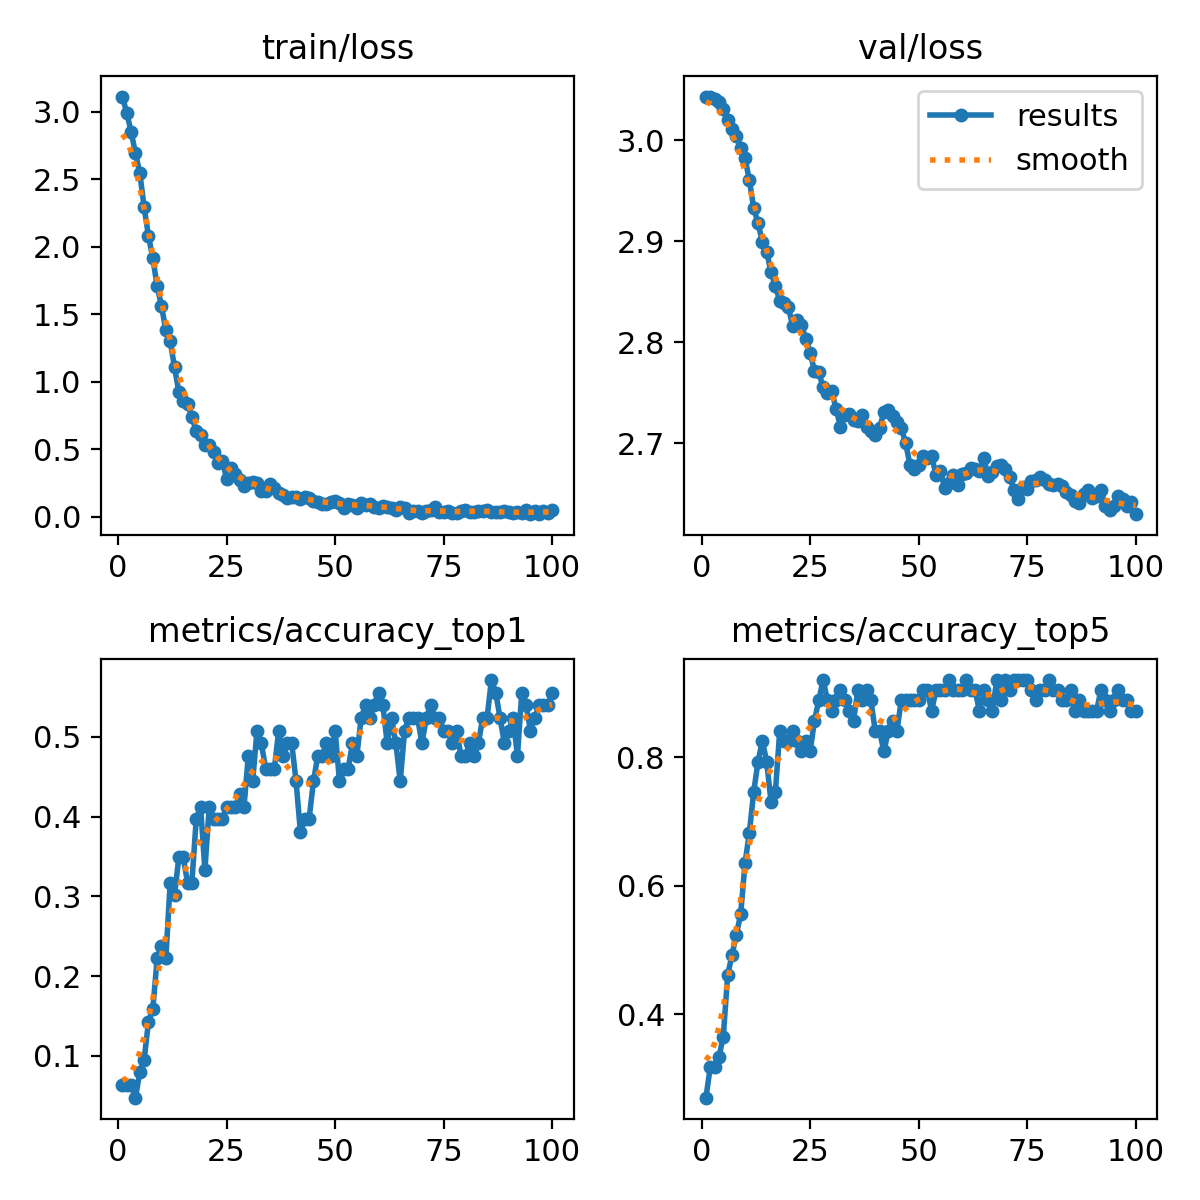

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train/results.png"

# Mostrar la imagen
display(Image(filename=ruta_imagen))


**Métricas obtenidas almacenadas en un dataframe**

In [ ]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv = "/content/runs/classify/train/results.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv(ruta_csv)

# Mostrar el DataFrame
df

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,3.11230,0.06349,0.26984,3.0435,0.000150,0.000150,0.000150
1,2,2.98990,0.06349,0.31746,3.0430,0.000304,0.000304,0.000304
2,3,2.85260,0.06349,0.31746,3.0410,0.000455,0.000455,0.000455
3,4,2.69210,0.04762,0.33333,3.0381,0.000603,0.000603,0.000603
4,5,2.54630,0.07937,0.36508,3.0308,0.000686,0.000686,0.000686
...,...,...,...,...,...,...,...,...
95,96,0.04310,0.52381,0.90476,2.6475,0.000050,0.000050,0.000050
96,97,0.01988,0.53968,0.88889,2.6445,0.000042,0.000042,0.000042
97,98,0.04031,0.53968,0.88889,2.6382,0.000035,0.000035,0.000035
98,99,0.02533,0.53968,0.87302,2.6421,0.000028,0.000028,0.000028


**Predicciones realizadas por el modelo**

**Etiquetas correctas:**

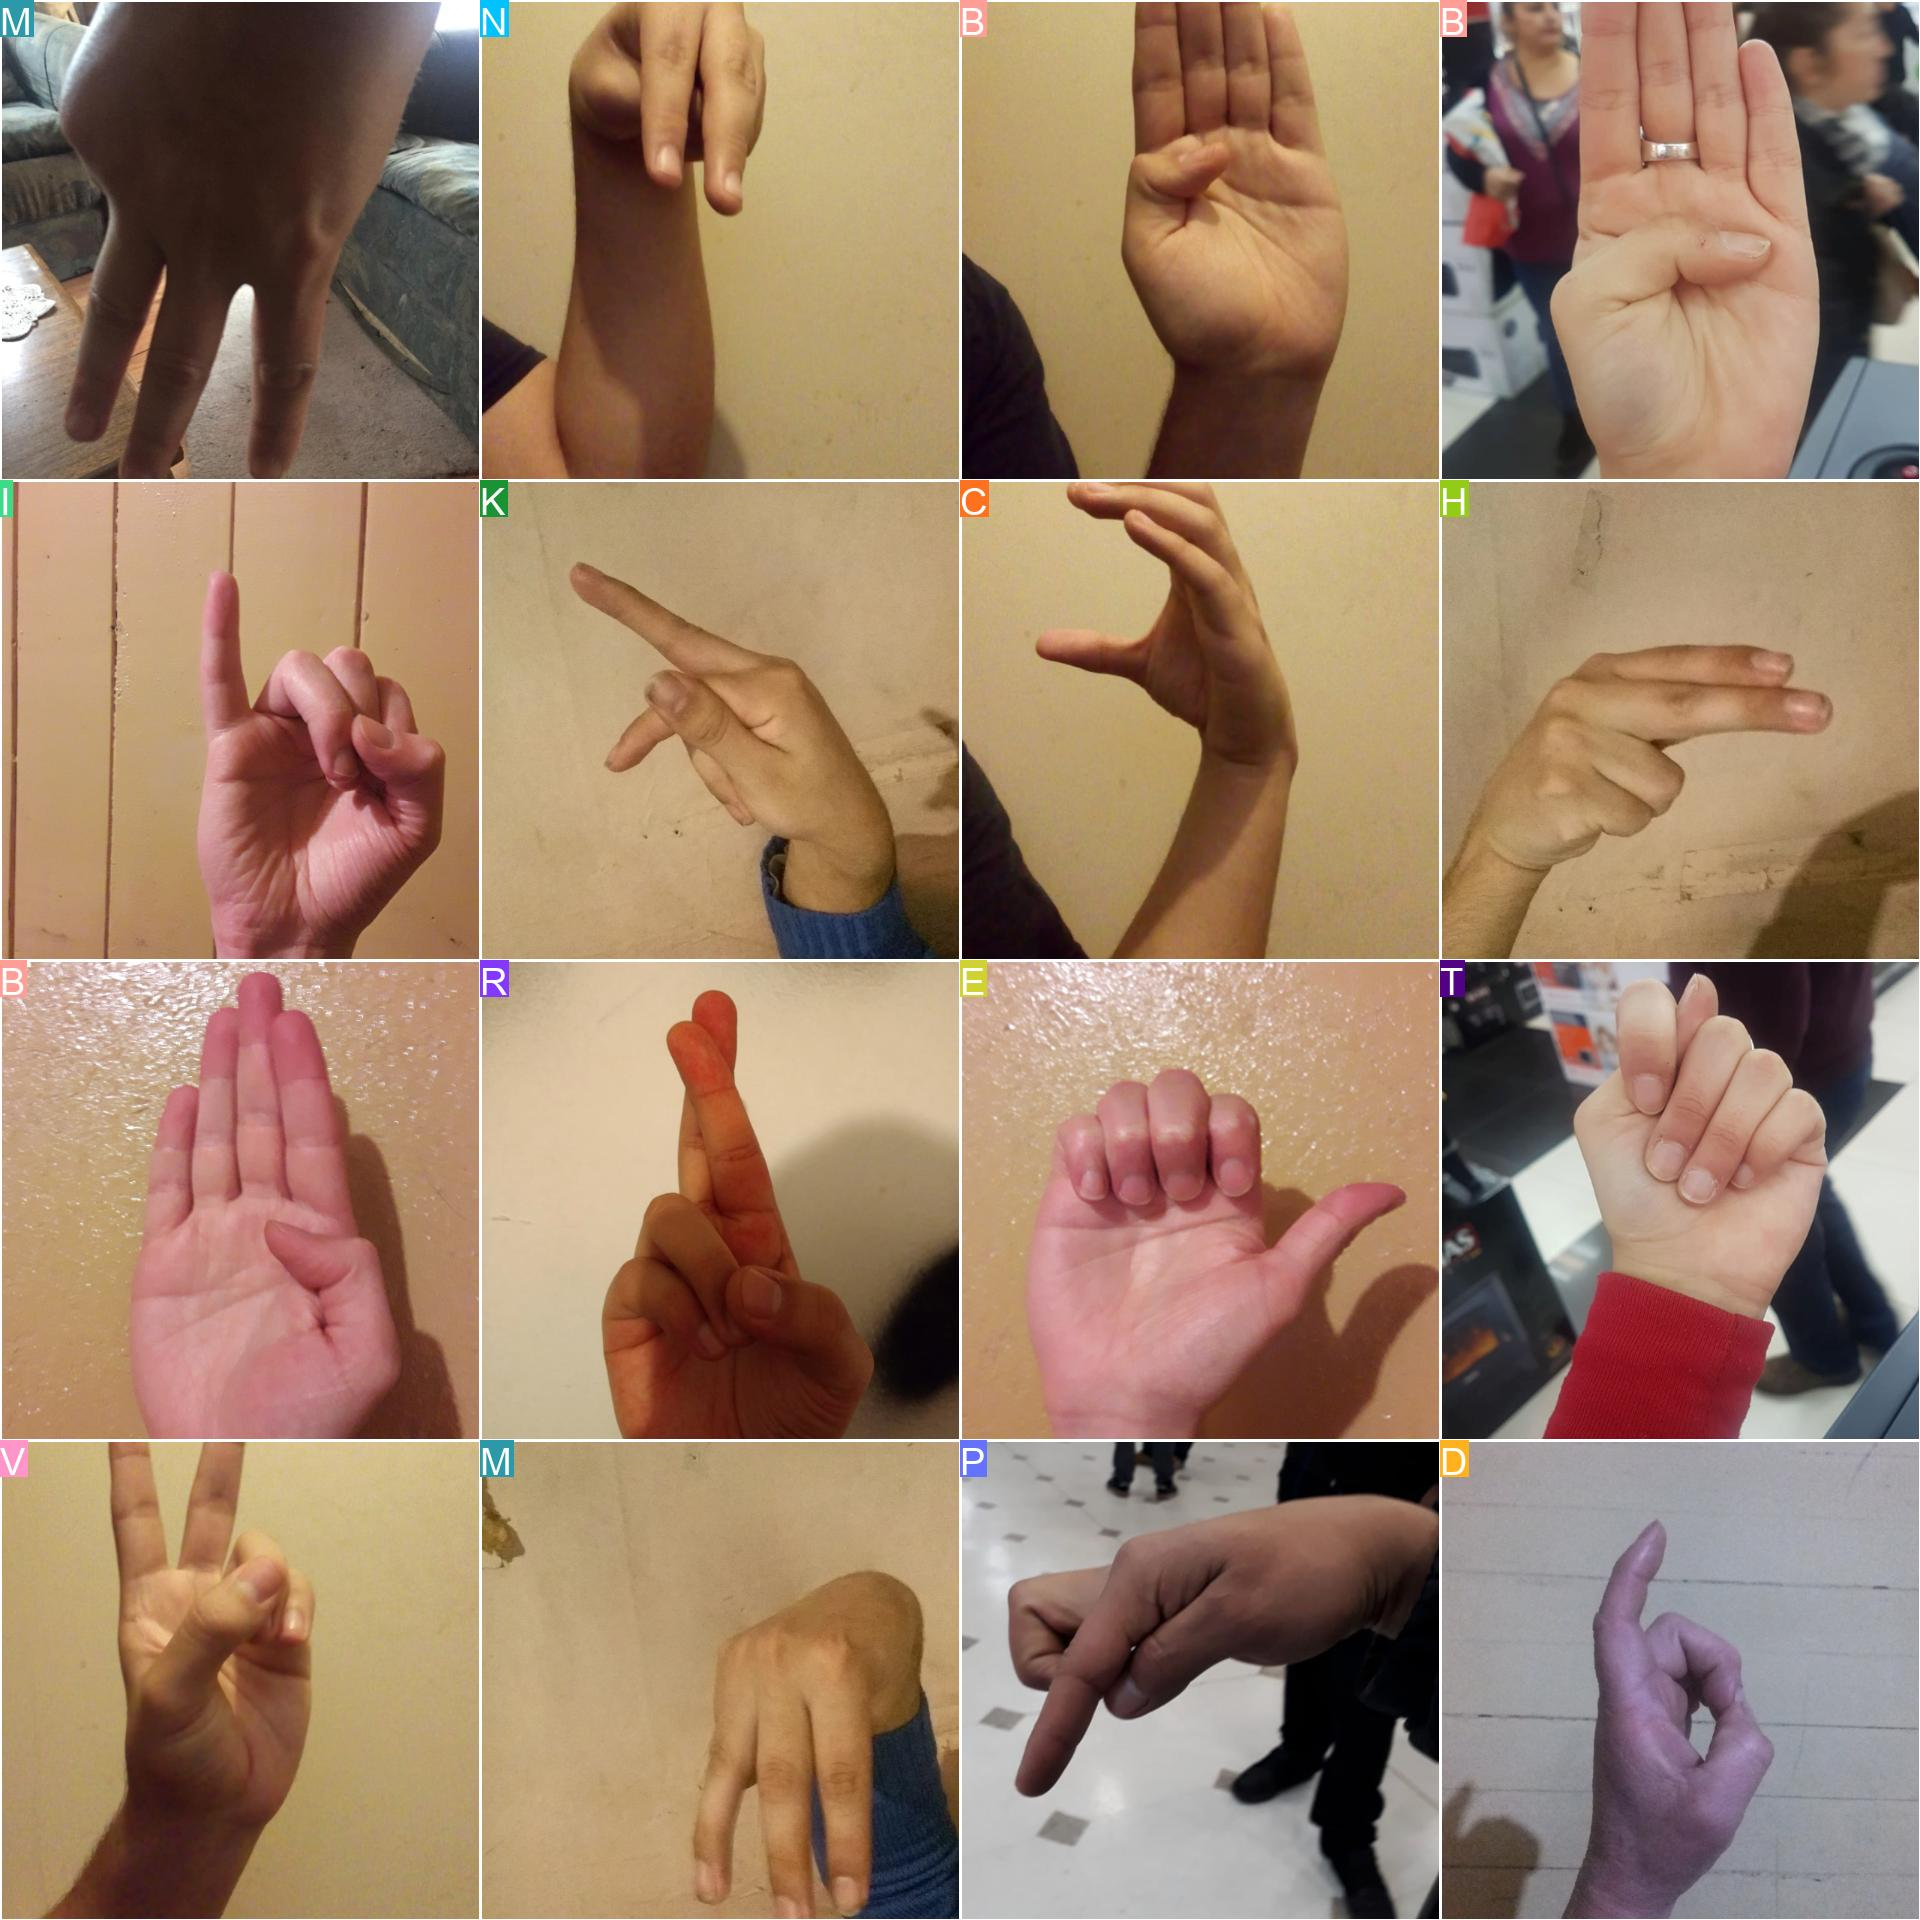

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train/val_batch0_labels.jpg"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

**Predicciones realizadas por el modelo YOLO:**

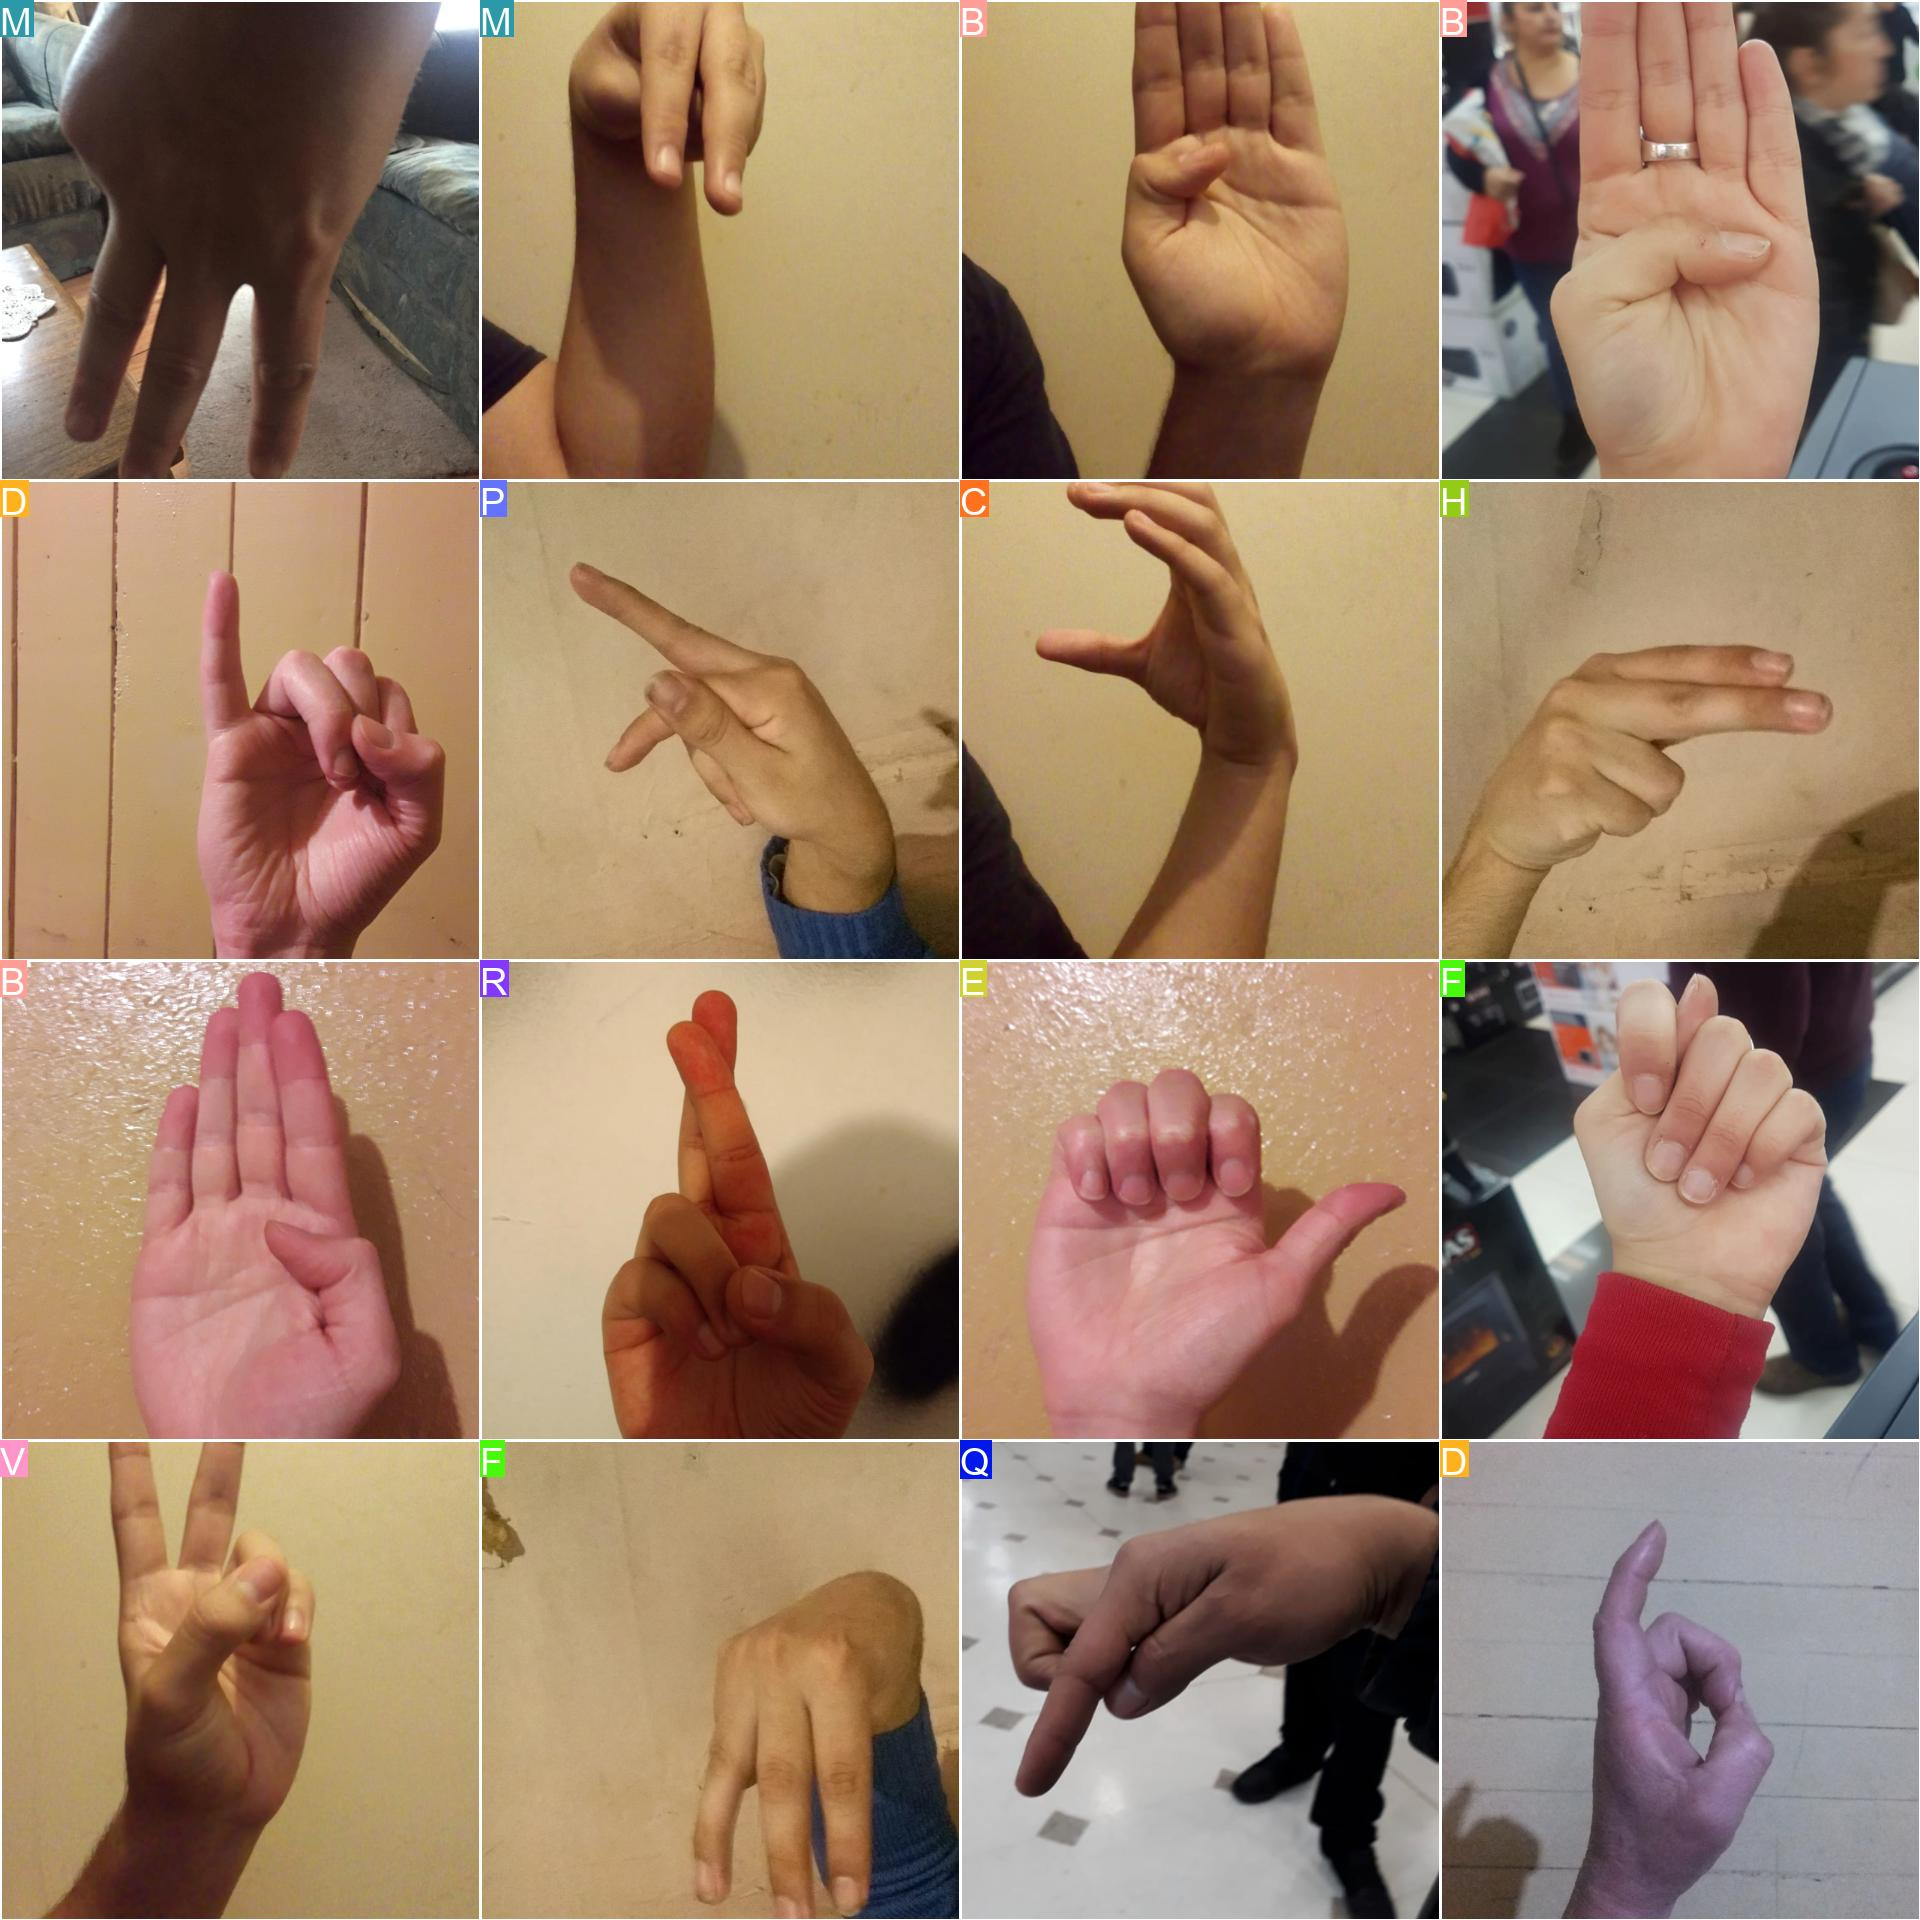

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train/val_batch0_pred.jpg"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

**Matriz de Confusión set de entrenamiento**

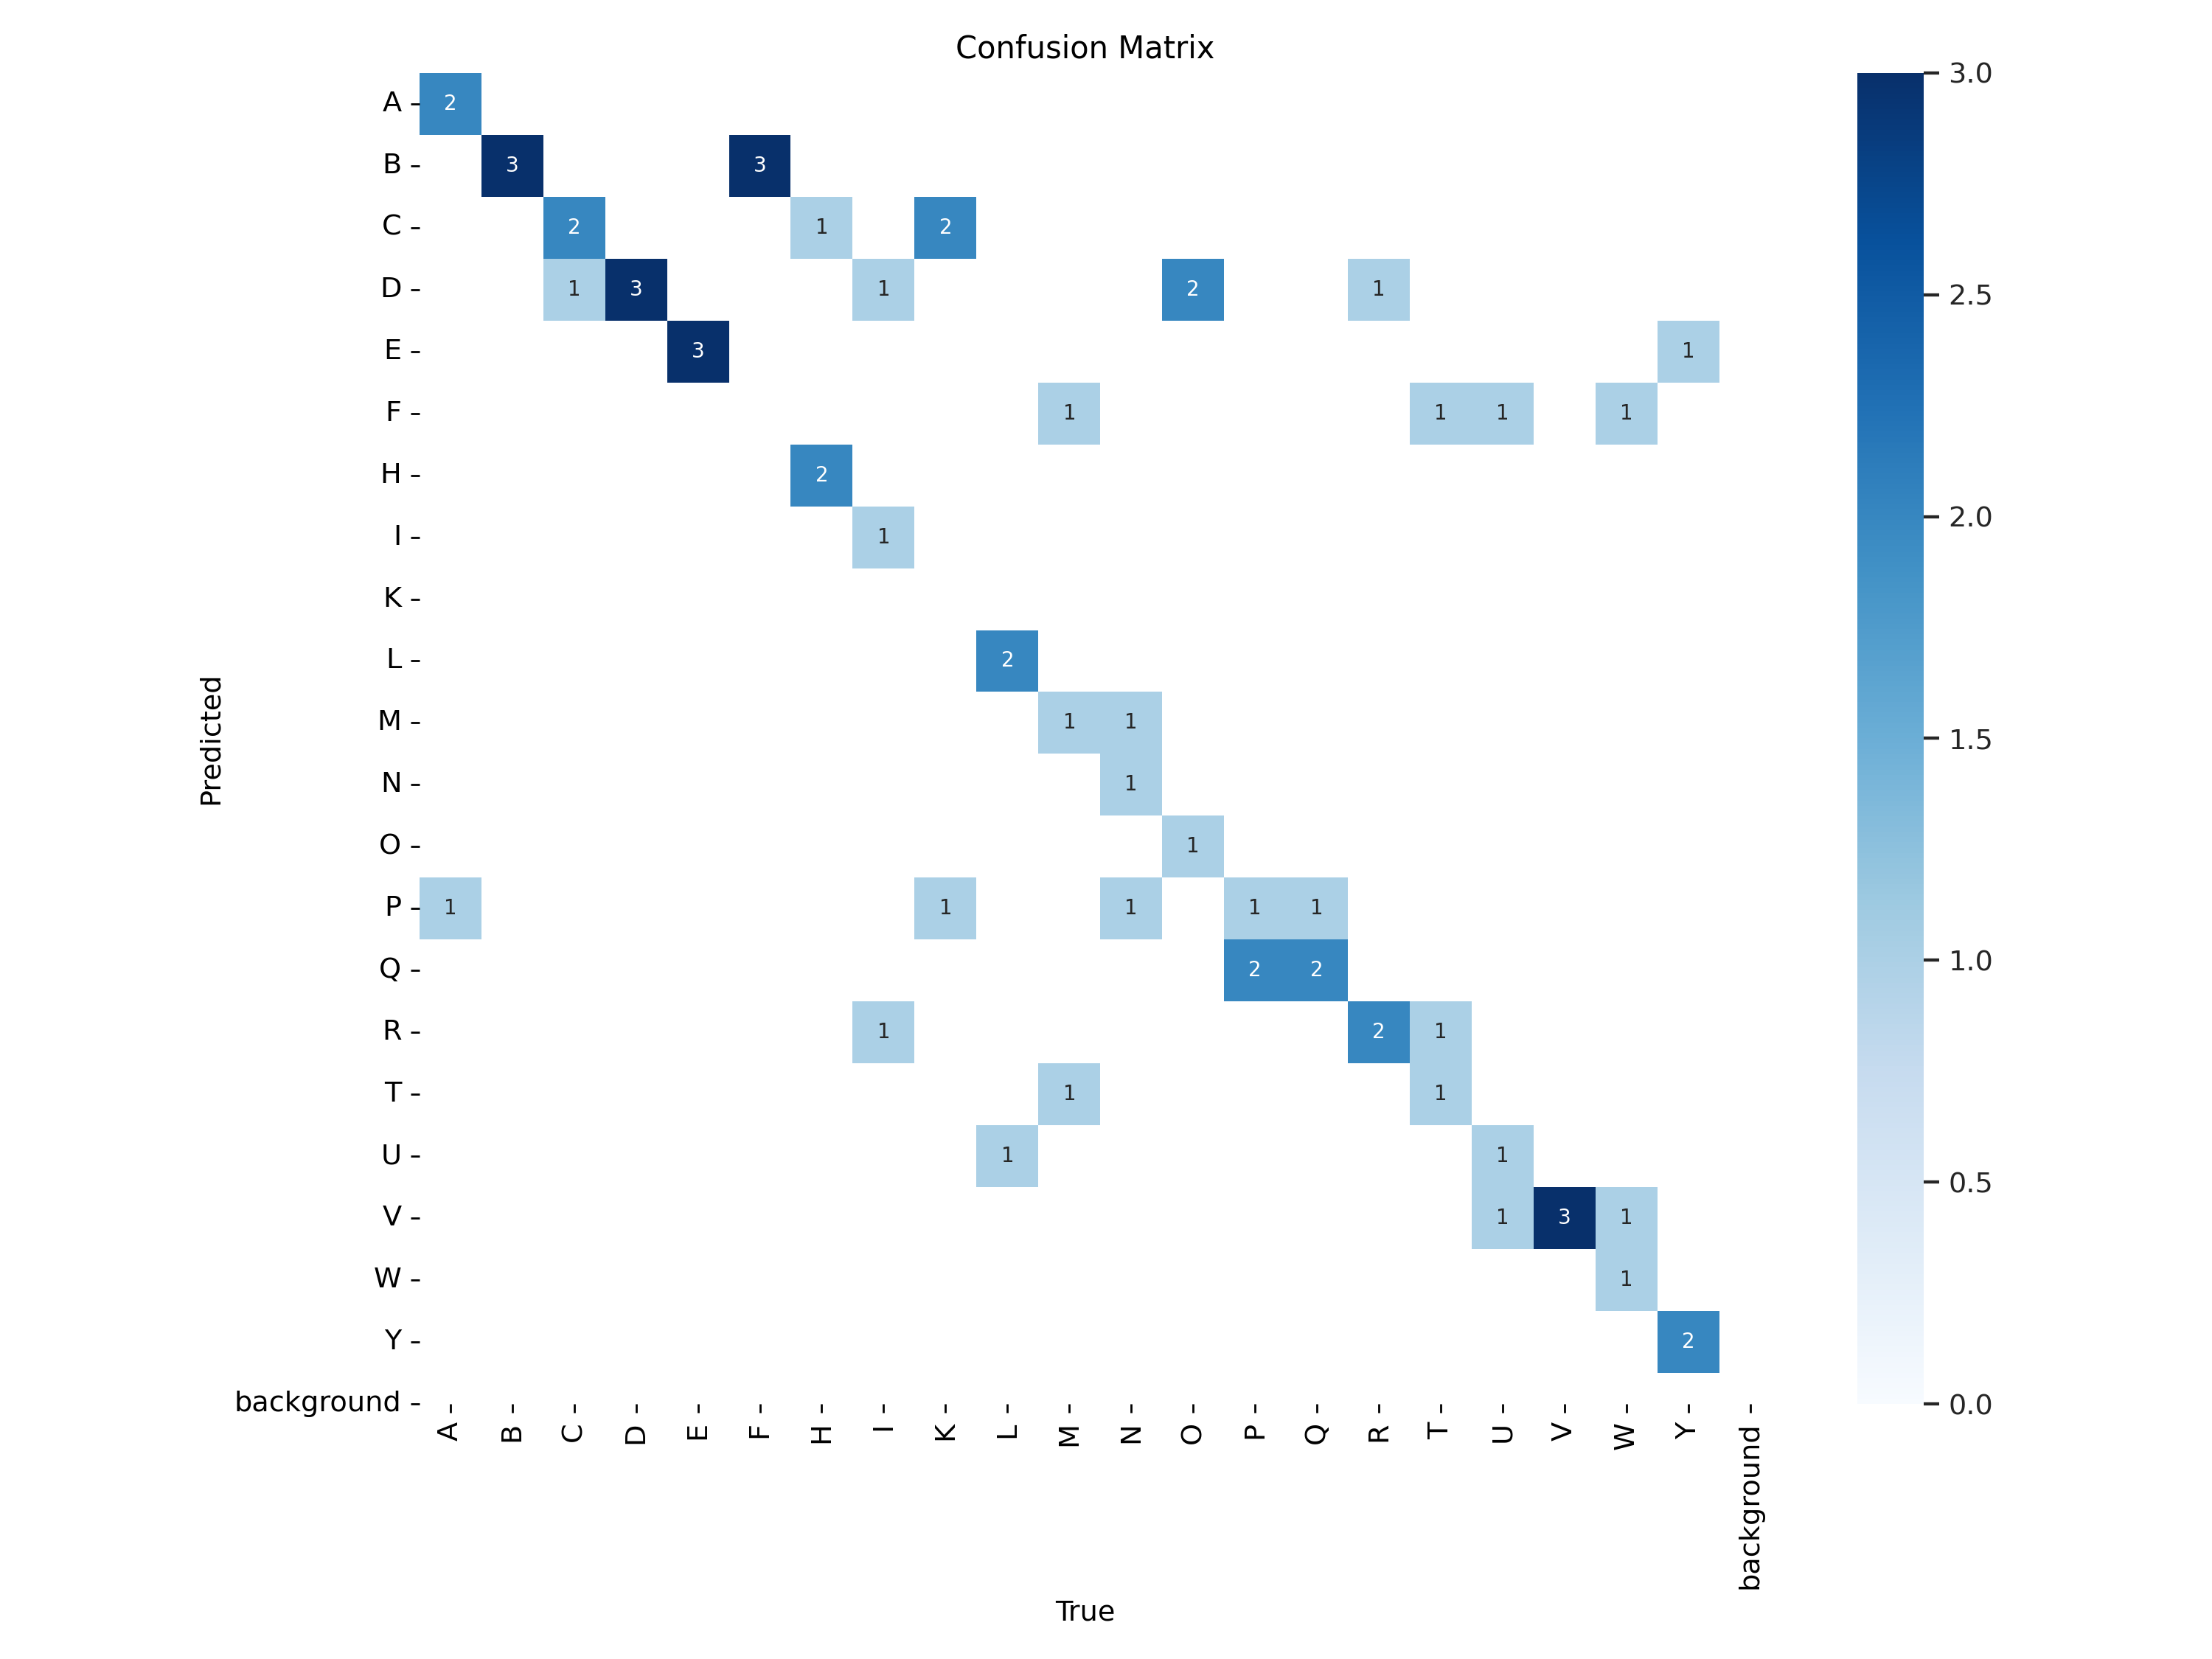

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train/confusion_matrix.png"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

**Entrenamiento de YOLO con imagenes sin fondo**


In [ ]:
ruta_principal = "/content/drive/MyDrive/tópico 1 ml/fondo_blanco_train"

In [ ]:
import shutil

ruta_train = os.path.join(ruta_principal, "train")
ruta_test = os.path.join(ruta_principal, "test")

carpeta_destino_train = "/content/dataset2/train"

carpeta_destino_test = "/content/dataset2/test"


if not os.path.exists(carpeta_destino_train):
    os.makedirs(carpeta_destino_train)
if not os.path.exists(carpeta_destino_test):
    os.makedirs(carpeta_destino_test)


for letra in os.listdir(ruta_train):
    ruta_letra = os.path.join(ruta_train, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_train, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))


for letra in os.listdir(ruta_test):
    ruta_letra = os.path.join(ruta_test, letra)
    for imagen in os.listdir(ruta_letra):
        ruta_imagen = os.path.join(ruta_letra, imagen)
        carpeta_letra_destino = os.path.join(carpeta_destino_test, letra)
        if not os.path.exists(carpeta_letra_destino):
            os.makedirs(carpeta_letra_destino)
        shutil.copy(ruta_imagen, os.path.join(carpeta_letra_destino, imagen))

**Se entrena el modelo YOLO con dataset con imágenes sin fondo**

In [ ]:
from ultralytics import YOLO

# Cargar un modelo
model2 = YOLO('/content/yolov8n-cls.pt')    # cargar un modelo preentrenado (recomendado para entrenamiento)


# Entrenar el modelo
results2 = model.train(data='/content/dataset2', epochs=100, imgsz=640, batch=8 )

Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=/content/yolov8n-cls.pt, data=/content/dataset2, epochs=100, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras

train: Scanning /content/dataset2/train... 176 images, 0 corrupt: 100%|██████████| 176/176 [00:00<00:00, 4754.68it/s]

train: New cache created: /content/dataset2/train.cache
albumentations: RandomResizedCrop(p=1.0, height=640, width=640, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)



val: Scanning /content/dataset2/test... 63 images, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 1688.26it/s]

val: New cache created: /content/dataset2/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train2
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.895G     0.5259          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.37it/s]

                   all      0.476      0.794



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.875G     0.4067          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.09it/s]


                   all      0.365       0.73

      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.875G     0.3164          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.92it/s]

                   all      0.381      0.794



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.875G     0.2704          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 27.09it/s]

                   all      0.429      0.762



      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.875G     0.2325          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.09it/s]


                   all       0.46      0.714

      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.875G     0.2348          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.17it/s]

                   all      0.397      0.762



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.875G     0.2378          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 25.95it/s]

                   all      0.381      0.762



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.875G     0.3016          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.49it/s]

                   all      0.365      0.778



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.875G      0.305          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.07it/s]

                   all      0.365      0.778



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.875G     0.1468          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.96it/s]

                   all      0.317       0.73



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.875G     0.1928          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.82it/s]


                   all      0.381       0.81

      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.875G     0.1698          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 14.40it/s]

                   all      0.397      0.778



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.875G     0.1922          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.53it/s]


                   all      0.429      0.762

      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.875G     0.1971          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.25it/s]

                   all      0.444      0.778



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.875G     0.1664          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.96it/s]

                   all      0.476      0.794



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.875G     0.1464          8        640: 100%|██████████| 22/22 [00:05<00:00,  4.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.68it/s]


                   all      0.476      0.762

      Epoch    GPU_mem       loss  Instances       Size


     17/100     0.875G     0.1399          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.67it/s]

                   all       0.46      0.778



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.875G      0.259          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.37it/s]

                   all      0.444       0.81



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.875G      0.178          8        640: 100%|██████████| 22/22 [00:07<00:00,  3.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.56it/s]


                   all      0.365      0.778

      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.877G     0.1369          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.42it/s]

                   all      0.381       0.73



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.875G     0.1441          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.43it/s]

                   all      0.381      0.714



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.875G     0.1329          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.75it/s]

                   all      0.286      0.683



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.875G     0.1041          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.42it/s]

                   all       0.27      0.667



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.875G     0.1678          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.62it/s]

                   all      0.333       0.73



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.875G     0.1221          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.51it/s]

                   all      0.349       0.73



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.877G     0.1324          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.46it/s]


                   all      0.286      0.683

      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.877G     0.1221          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.94it/s]

                   all      0.349      0.683



      Epoch    GPU_mem       loss  Instances       Size


     28/100     0.875G    0.08614          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.08it/s]

                   all      0.317       0.73



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.875G     0.1482          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.63it/s]

                   all      0.286      0.698



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.875G     0.1094          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.56it/s]

                   all      0.302       0.73



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.875G     0.1437          8        640: 100%|██████████| 22/22 [00:07<00:00,  3.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.60it/s]

                   all       0.27      0.698



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.877G     0.1209          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.58it/s]

                   all      0.302      0.714



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.875G     0.1691          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.63it/s]

                   all      0.302      0.683



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.877G     0.1482          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.85it/s]

                   all      0.333       0.73



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.875G    0.07929          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 17.80it/s]

                   all      0.349      0.714



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.875G    0.09181          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.96it/s]

                   all      0.333      0.714



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.875G    0.07835          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.35it/s]


                   all      0.317      0.714

      Epoch    GPU_mem       loss  Instances       Size


     38/100     0.875G     0.0664          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.72it/s]


                   all      0.317      0.698

      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.875G    0.04944          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.01it/s]

                   all      0.333      0.698



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.875G      0.063          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.19it/s]

                   all      0.333      0.714



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.875G    0.06837          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.50it/s]

                   all      0.349      0.746



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.877G    0.07861          8        640: 100%|██████████| 22/22 [00:07<00:00,  3.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.28it/s]

                   all      0.365      0.778



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.875G    0.05642          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.05it/s]

                   all      0.317      0.794



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.875G    0.06135          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 26.61it/s]

                   all      0.333      0.746



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.875G    0.06993          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.53it/s]

                   all      0.333       0.73



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.875G    0.05968          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 22.20it/s]

                   all      0.286      0.698



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.875G    0.04507          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.99it/s]

                   all       0.27      0.698



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.875G    0.08389          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.34it/s]

                   all      0.254      0.667



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.875G    0.04964          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.86it/s]

                   all       0.27      0.651



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.875G    0.02974          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.14it/s]

                   all      0.302      0.683



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.875G    0.08017          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.34it/s]

                   all      0.302      0.714



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.875G    0.05538          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 20.14it/s]

                   all       0.27      0.698



      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.875G     0.1041          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.70it/s]

                   all      0.254      0.683



      Epoch    GPU_mem       loss  Instances       Size


     54/100     0.875G    0.07121          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.51it/s]

                   all       0.27      0.667



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.875G    0.06675          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 19.91it/s]

                   all      0.317      0.651



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.875G    0.02756          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.54it/s]

                   all      0.286      0.683



      Epoch    GPU_mem       loss  Instances       Size


     57/100     0.875G    0.05575          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.26it/s]

                   all      0.302      0.698



      Epoch    GPU_mem       loss  Instances       Size


     58/100     0.877G    0.05985          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 23.38it/s]

                   all      0.286      0.714



      Epoch    GPU_mem       loss  Instances       Size


     59/100     0.877G    0.02684          8        640: 100%|██████████| 22/22 [00:07<00:00,  2.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 13.52it/s]

                   all       0.27      0.683



      Epoch    GPU_mem       loss  Instances       Size


     60/100     0.875G    0.03384          8        640: 100%|██████████| 22/22 [00:06<00:00,  3.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 13.91it/s]

                   all      0.397       0.73



      Epoch    GPU_mem       loss  Instances       Size


     61/100     0.875G    0.03422          8        640: 100%|██████████| 22/22 [00:07<00:00,  3.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 15.56it/s]

                   all      0.333      0.714



      Epoch    GPU_mem       loss  Instances       Size


     62/100     0.875G    0.04168          8        640: 100%|██████████| 22/22 [00:07<00:00,  3.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 18.19it/s]

                   all      0.349      0.714



      Epoch    GPU_mem       loss  Instances       Size


     63/100     0.875G    0.04765          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 16.97it/s]

                   all      0.381      0.683



      Epoch    GPU_mem       loss  Instances       Size


     64/100     0.877G     0.0432          8        640: 100%|██████████| 22/22 [00:08<00:00,  2.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 24.47it/s]

                   all      0.349       0.73



      Epoch    GPU_mem       loss  Instances       Size


     65/100     0.875G    0.04149          8        640: 100%|██████████| 22/22 [00:05<00:00,  3.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 21.04it/s]


                   all      0.365       0.73
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

65 epochs completed in 0.144 hours.
Optimizer stripped from runs/classify/train2/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train2/weights/best.pt, 3.0MB

Validating runs/classify/train2/weights/best.pt...
Ultralytics YOLOv8.0.218 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1461781 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/dataset2/train... found 176 images in 21 classes ✅ 
val: None...
test: /content/dataset2/test... found 63 images in 21 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all      0.492      0.794
Speed: 0.6ms preprocess, 1.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
Results saved to runs/classify/train2


**Métricas obtenidas del set de entrenamiento con imágenes sin fondo**

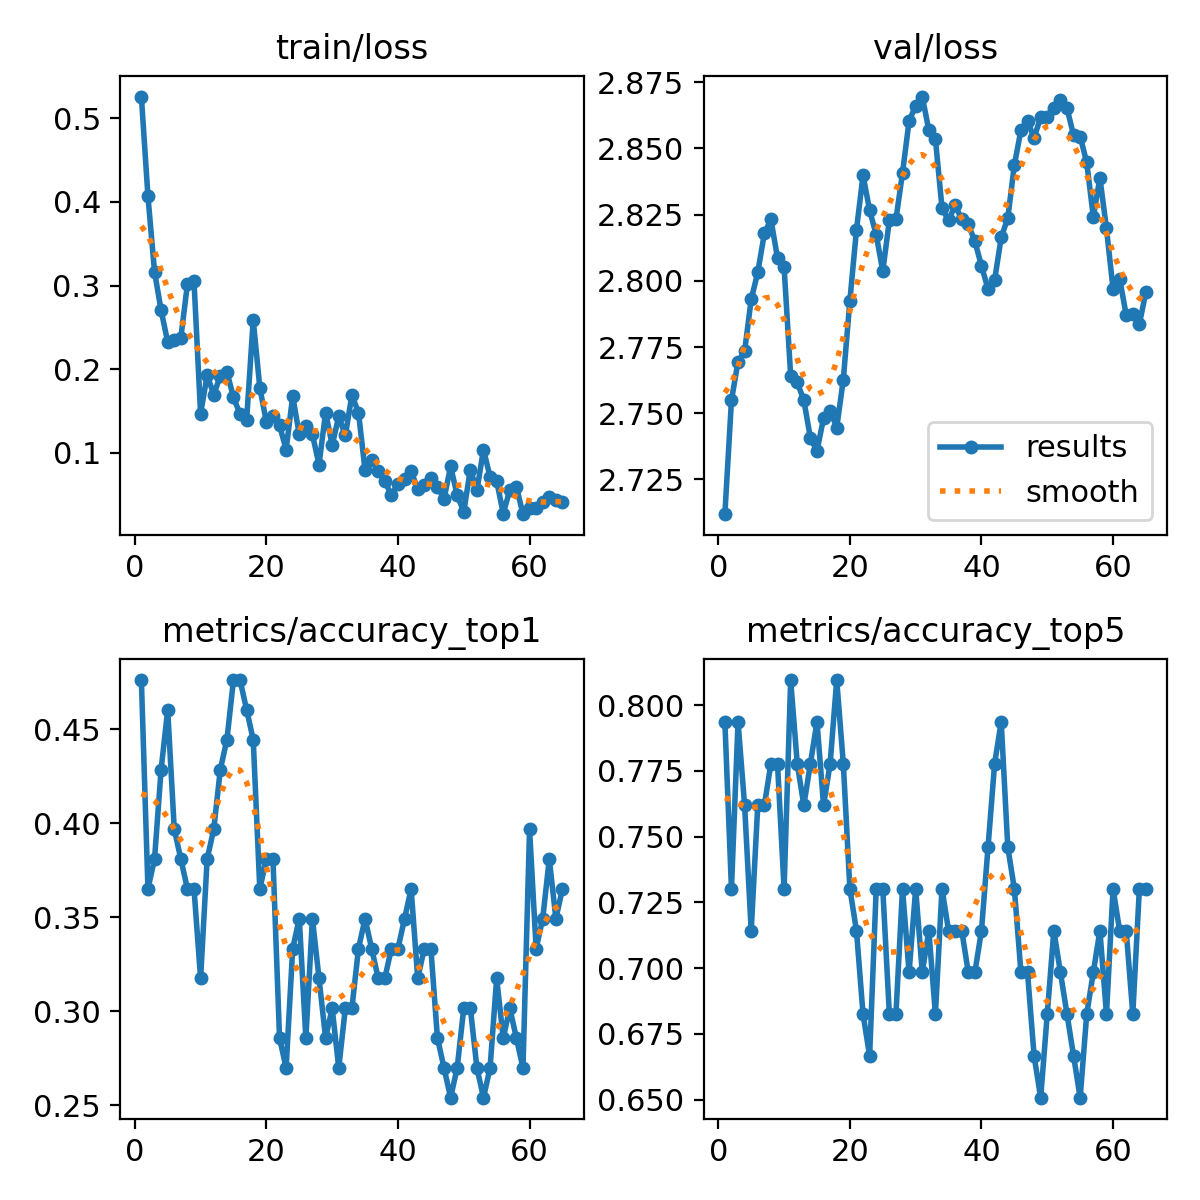

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train2/results.png"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

In [ ]:
import pandas as pd

# Ruta del archivo CSV
ruta_csv2 = "/content/runs/classify/train2/results.csv"

# Cargar el archivo CSV en un DataFrame de pandas
df1 = pd.read_csv(ruta_csv2)

# Mostrar el DataFrame
df1

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.52591,0.47619,0.79365,2.7119,0.000150,0.000150,0.000150
1,2,0.40670,0.36508,0.73016,2.7549,0.000304,0.000304,0.000304
2,3,0.31643,0.38095,0.79365,2.7695,0.000455,0.000455,0.000455
3,4,0.27042,0.42857,0.76190,2.7734,0.000603,0.000603,0.000603
4,5,0.23254,0.46032,0.71429,2.7930,0.000686,0.000686,0.000686
...,...,...,...,...,...,...,...,...
60,61,0.03422,0.33333,0.71429,2.8008,0.000297,0.000297,0.000297
61,62,0.04168,0.34921,0.71429,2.7871,0.000290,0.000290,0.000290
62,63,0.04765,0.38095,0.68254,2.7876,0.000283,0.000283,0.000283
63,64,0.04320,0.34921,0.73016,2.7837,0.000276,0.000276,0.000276


**Etiquetas correctas:**

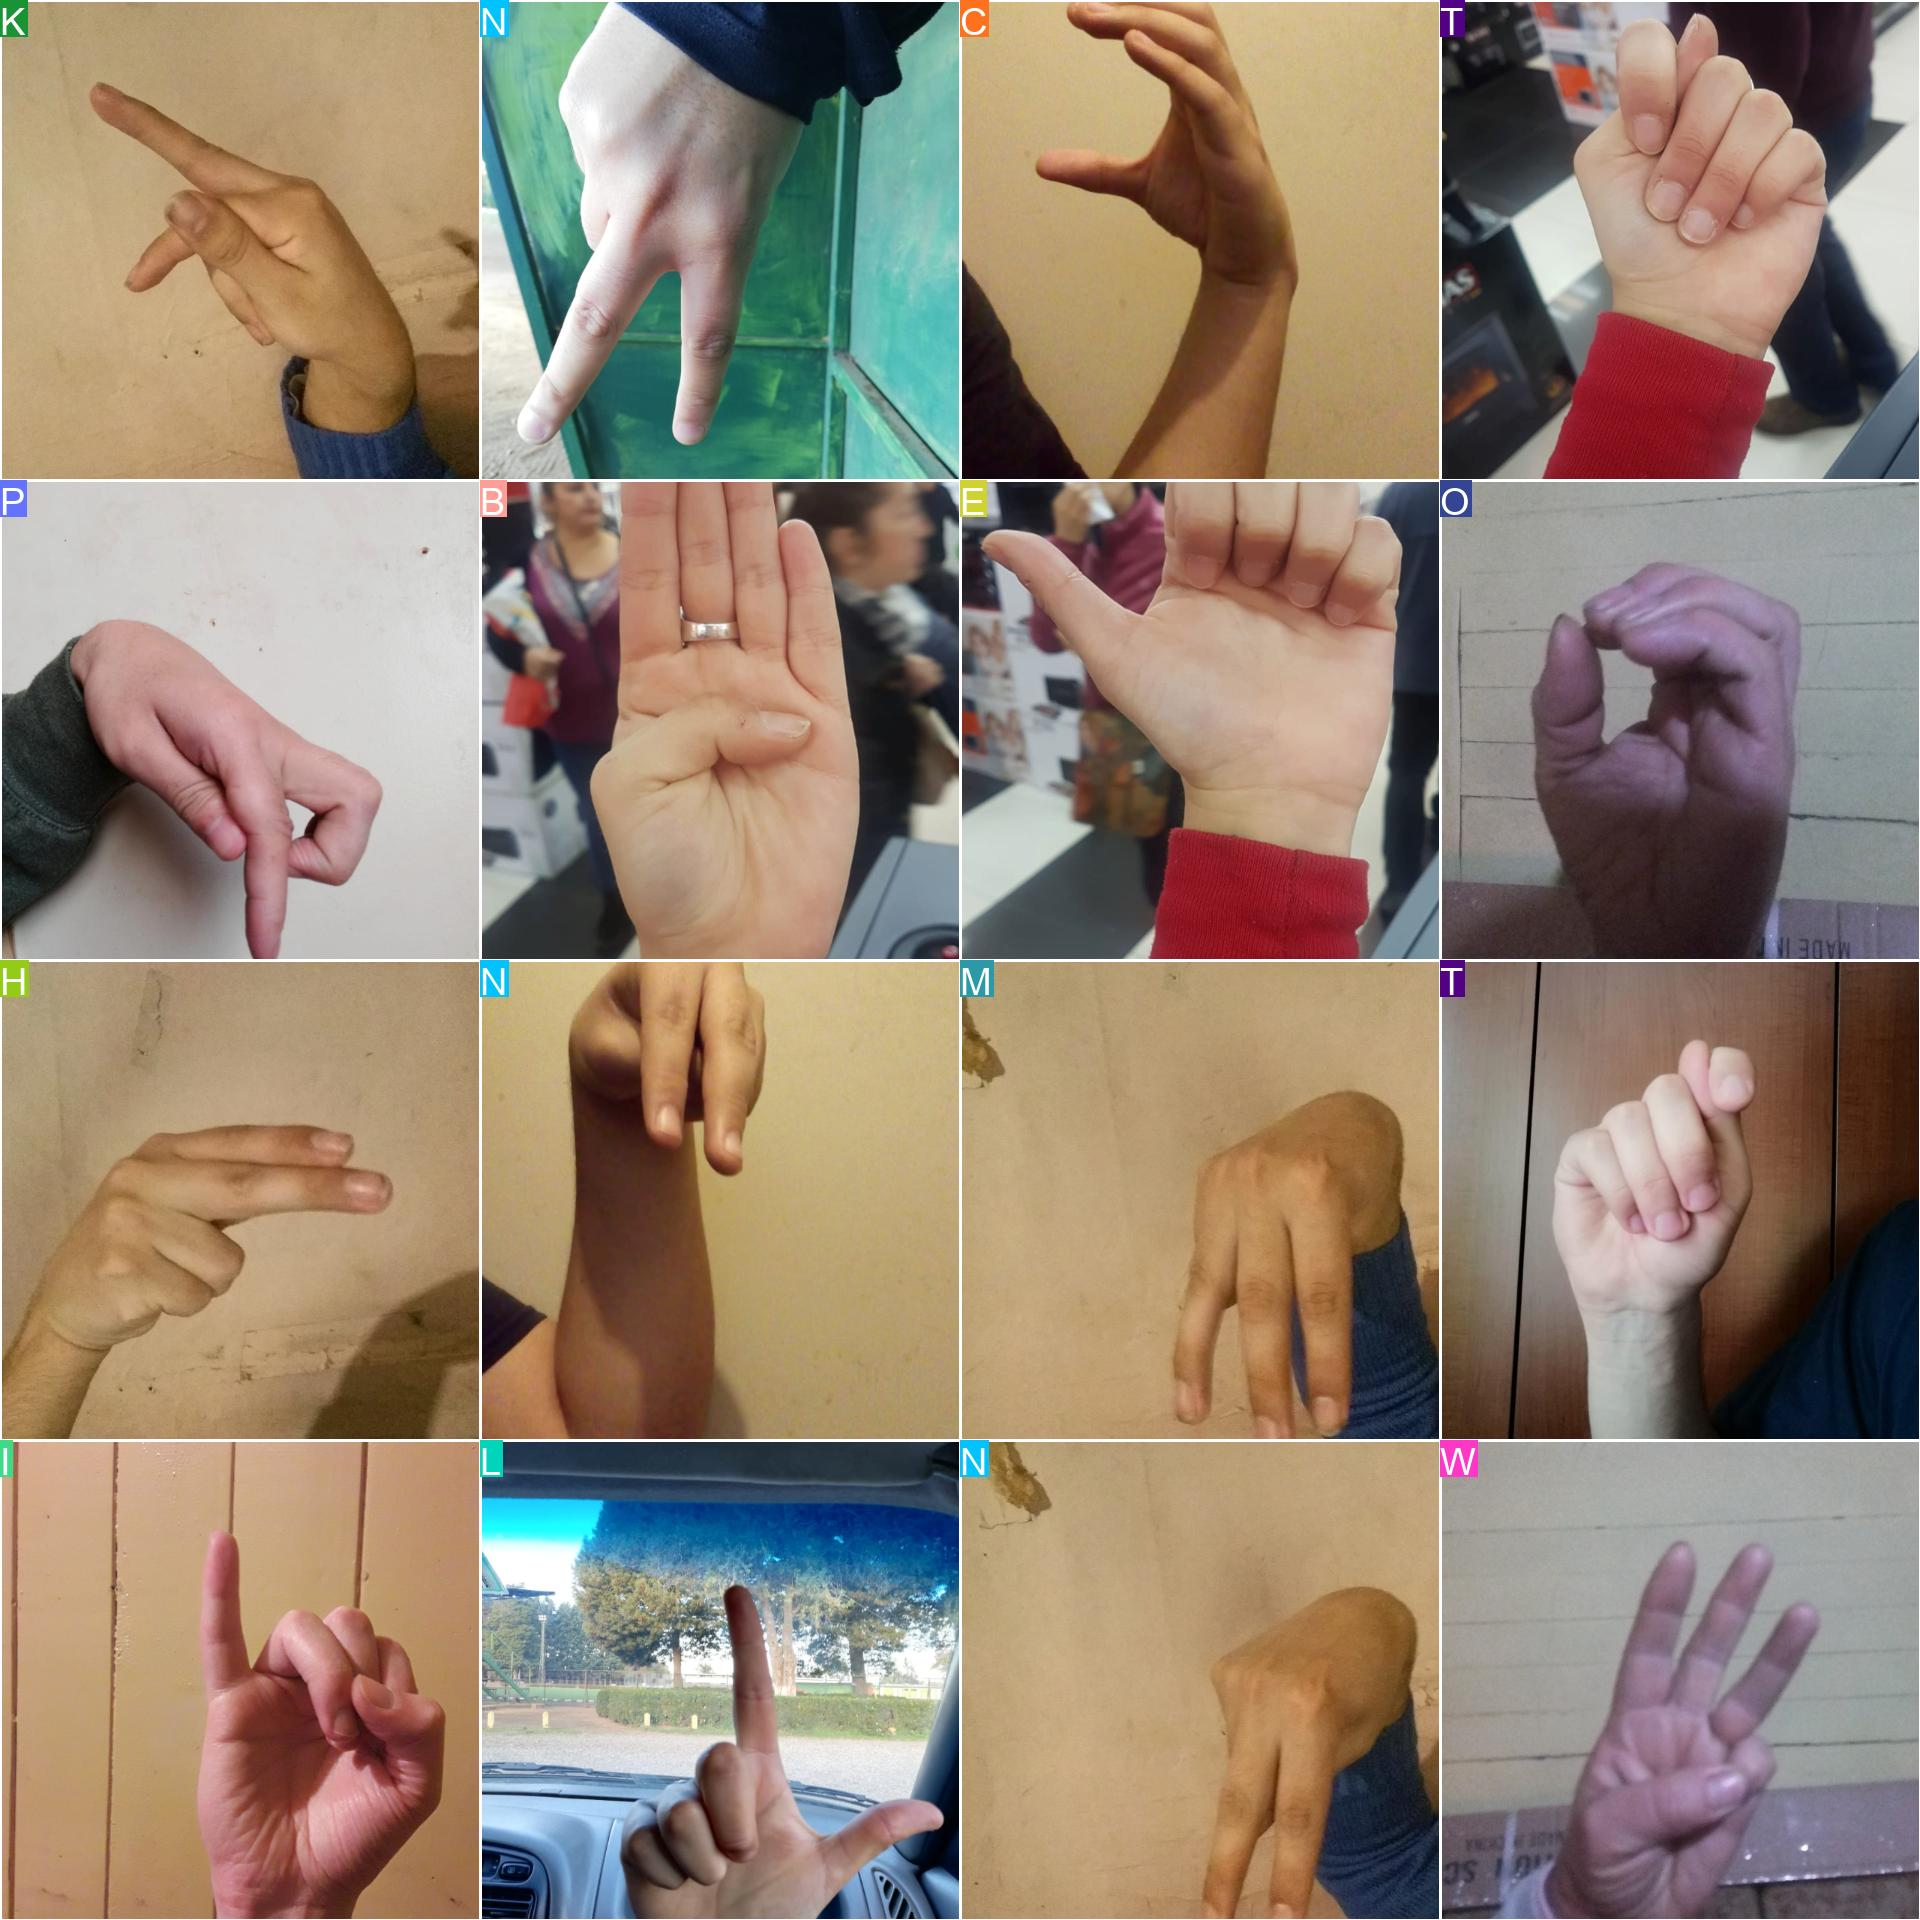

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train2/val_batch0_labels.jpg"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

**Predicciones realizadas por el modelo**

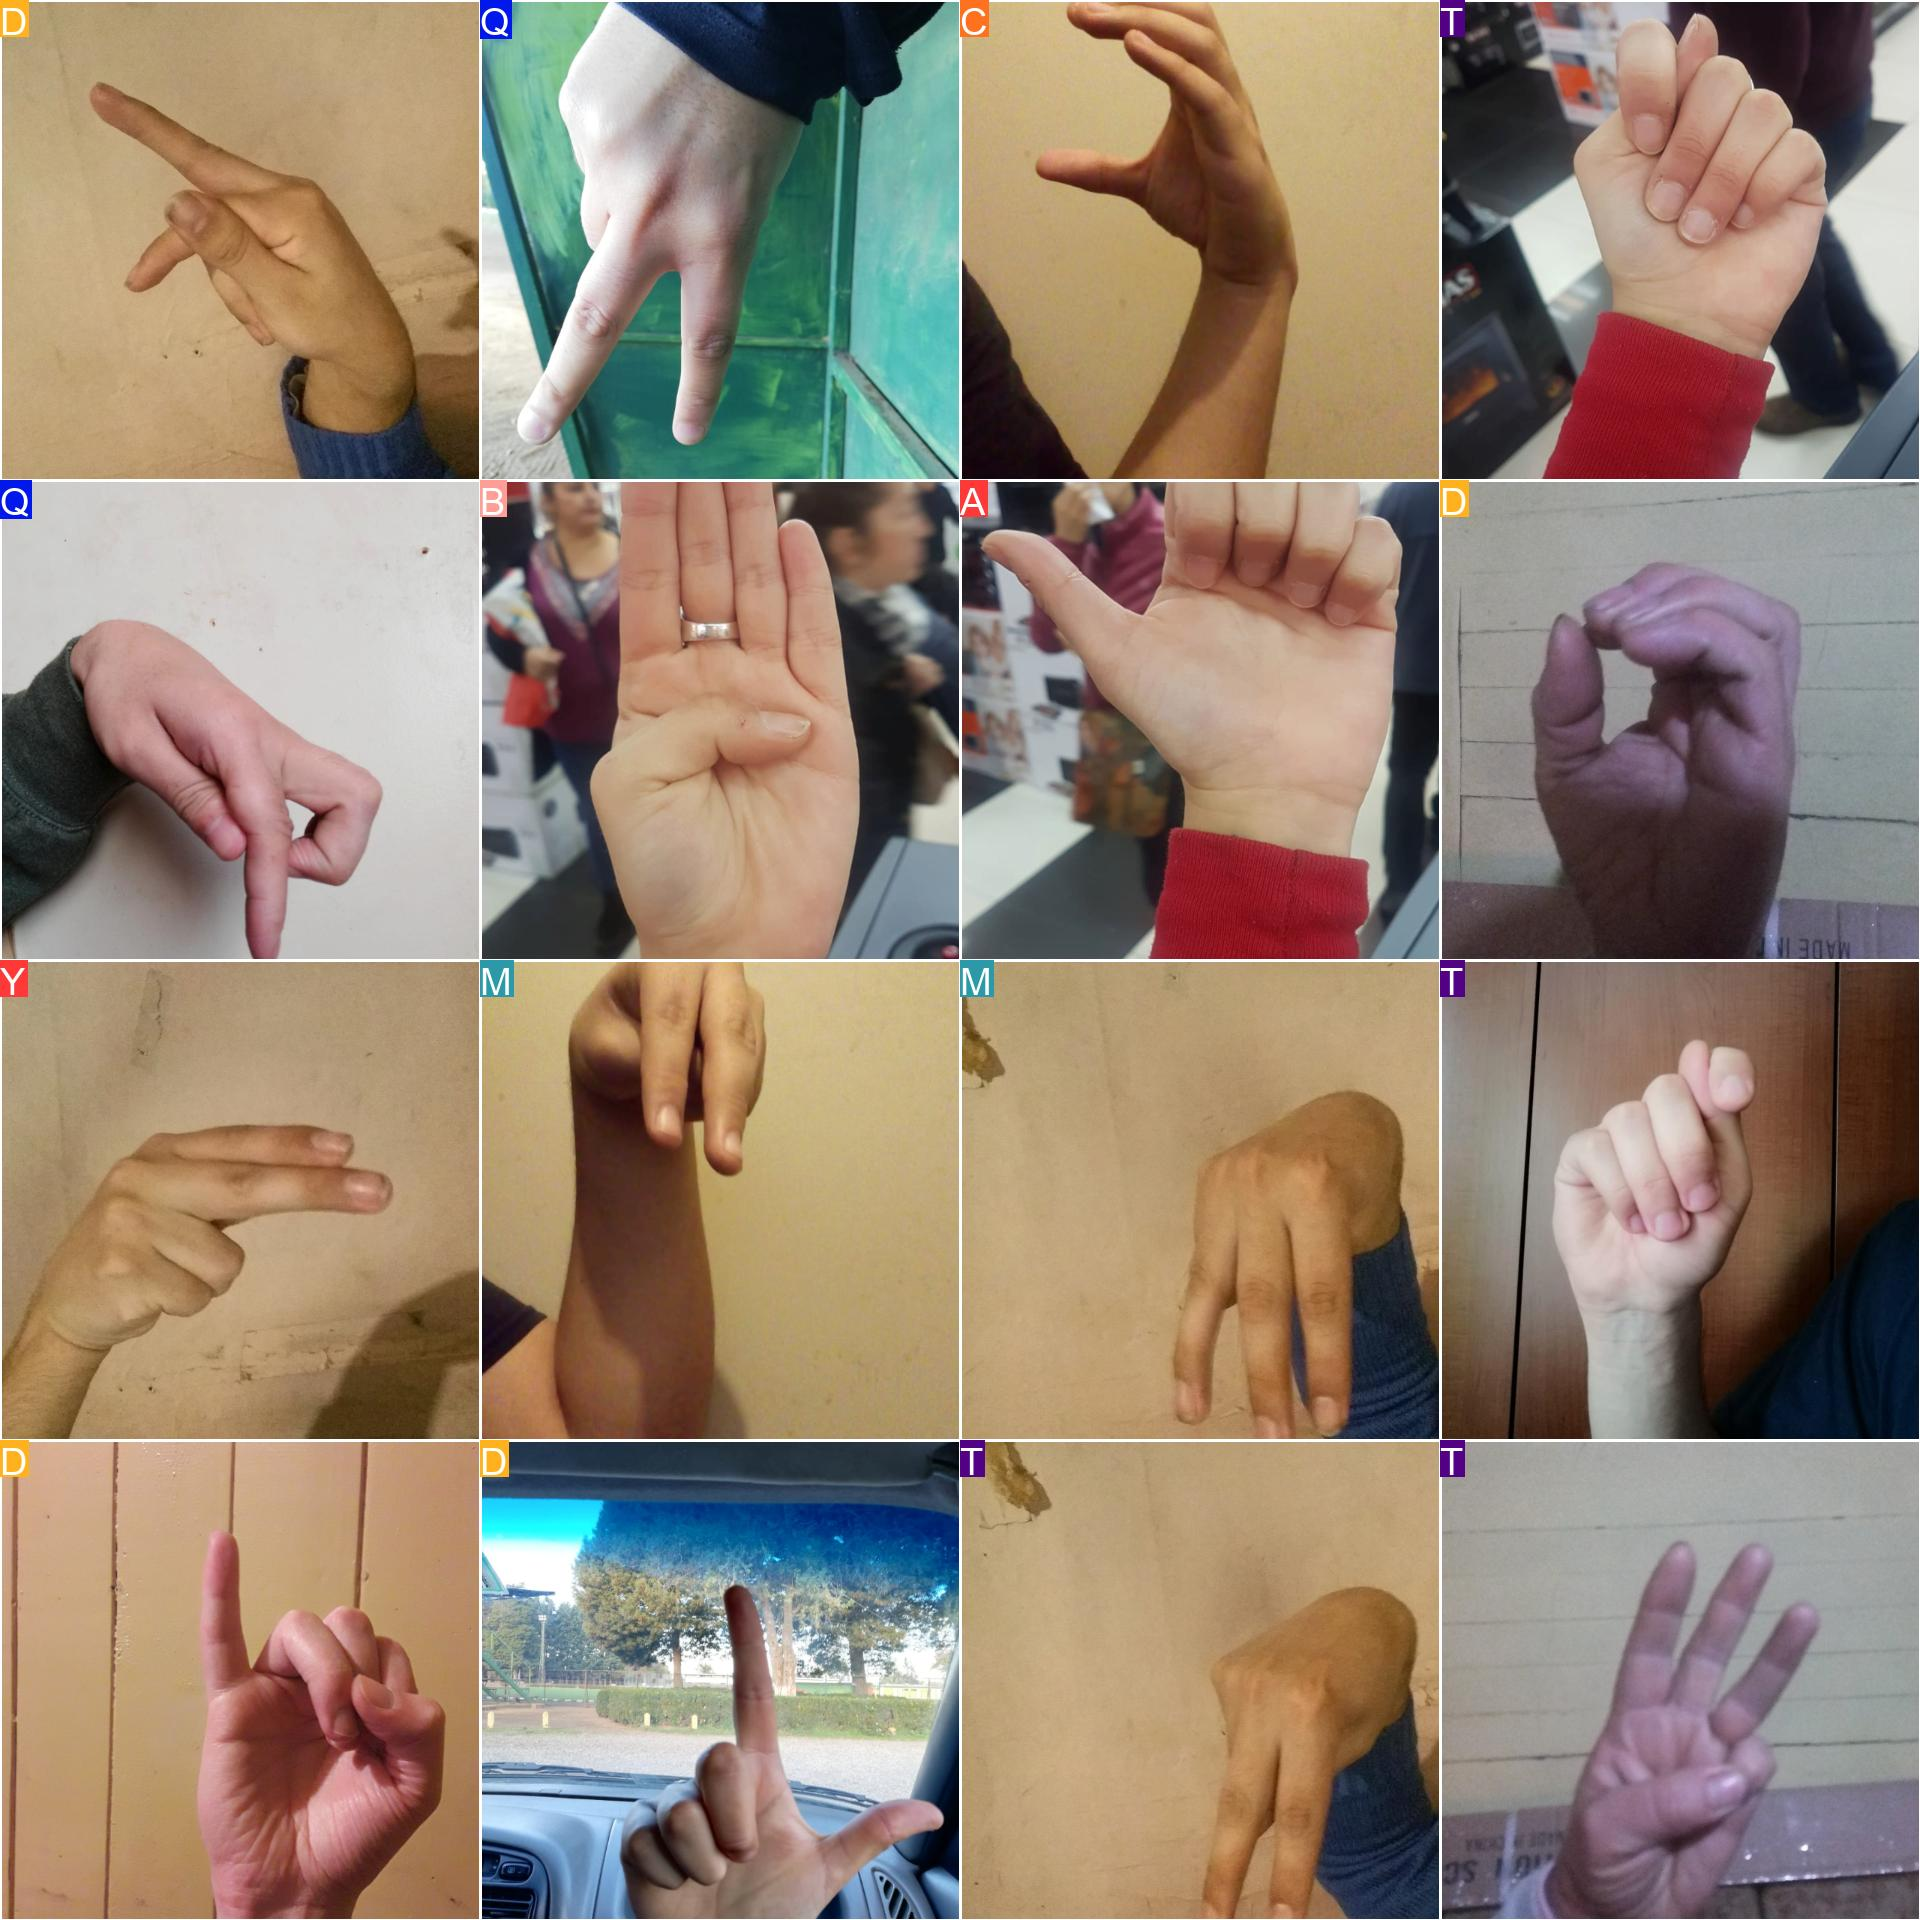

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train2/val_batch0_pred.jpg"

# Mostrar la imagen
display(Image(filename=ruta_imagen))

**Matriz de confusión imágenes sin fondo**

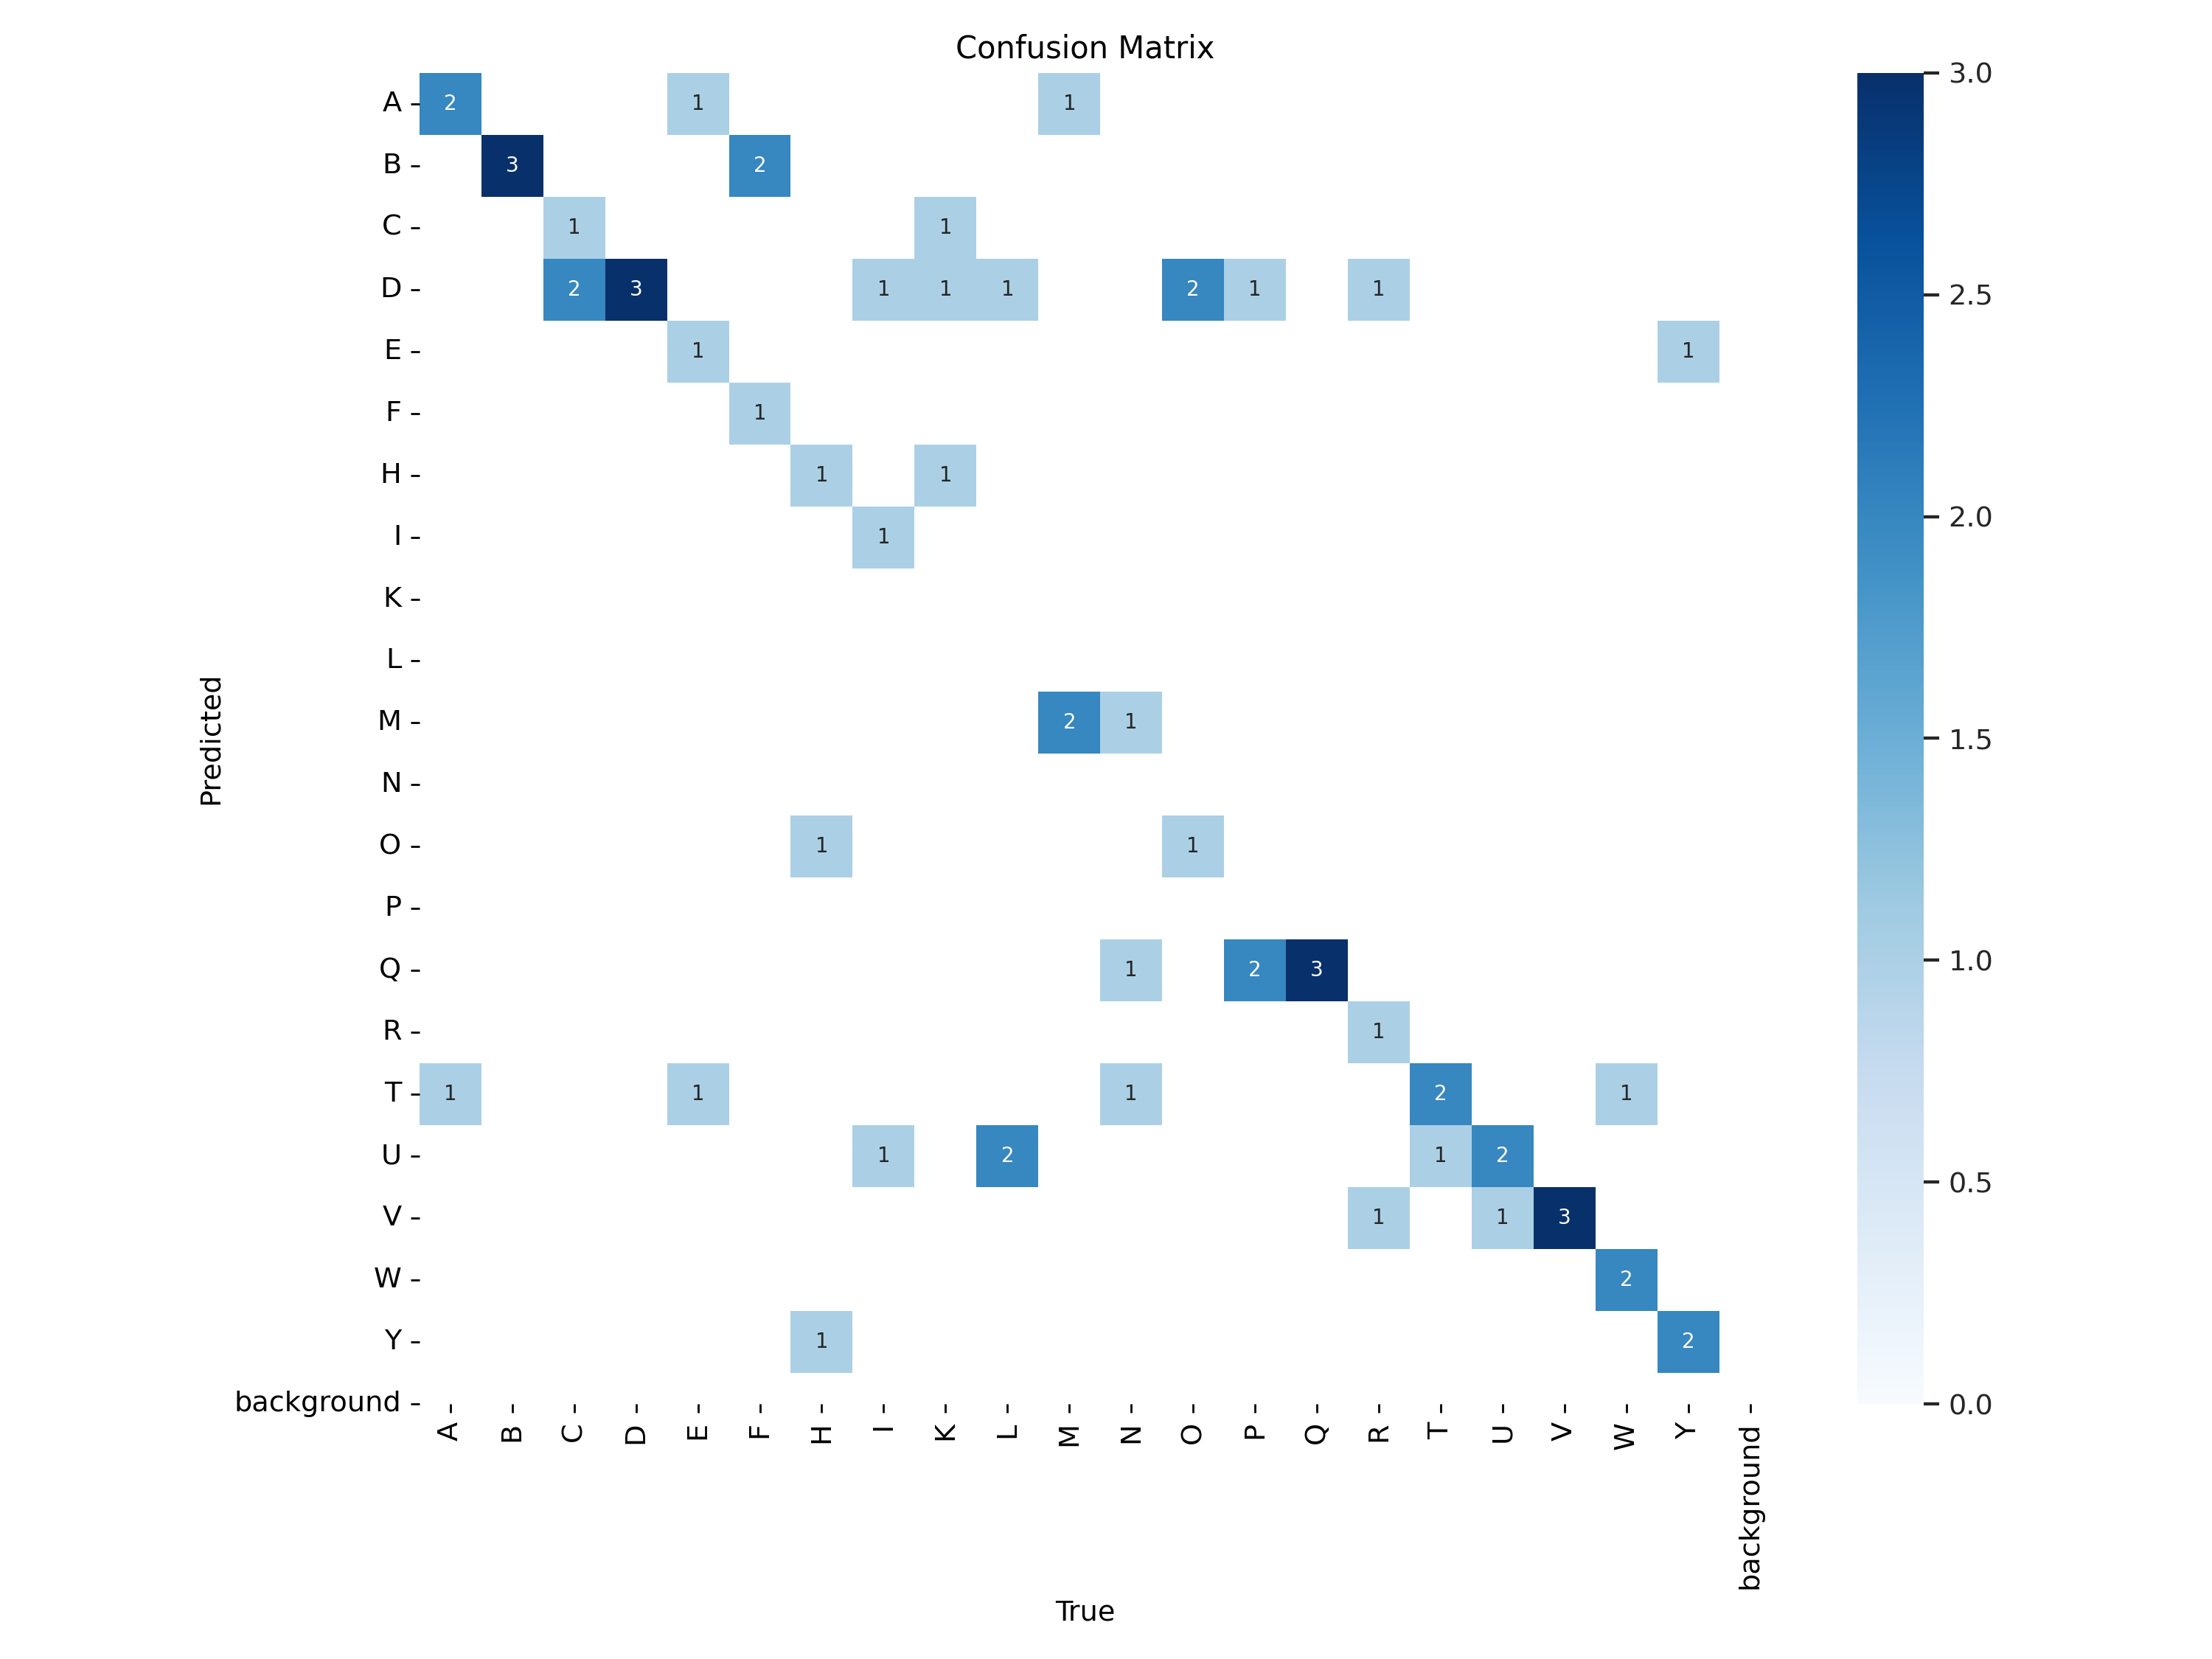

In [ ]:
from IPython.display import Image, display

# Ruta de la imagen
ruta_imagen = "/content/runs/classify/train2/confusion_matrix.png"

# Mostrar la imagen
display(Image(filename=ruta_imagen))